In [43]:

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
out = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Challenges/challenge2-data-science-LATAM/out.csv')
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7043 non-null   int64  
 1   customerID                 7043 non-null   object 
 2   Churn                      7043 non-null   int64  
 3   customer.gender            7043 non-null   int64  
 4   customer.SeniorCitizen     7043 non-null   int64  
 5   customer.Partner           7043 non-null   int64  
 6   customer.Dependents        7043 non-null   int64  
 7   customer.tenure            7043 non-null   int64  
 8   phone.PhoneService         7043 non-null   int64  
 9   phone.MultipleLines        7043 non-null   int64  
 10  internet.InternetService   7043 non-null   int64  
 11  internet.OnlineSecurity    7043 non-null   int64  
 12  internet.OnlineBackup      7043 non-null   int64  
 13  internet.DeviceProtection  7043 non-null   int64

In [46]:
out.drop(columns = ['customerID', 'Unnamed: 0'], inplace = True)
out['account.Charges.Total'] = out['account.Charges.Total'].fillna(out['account.Charges.Total'].median())
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   int64  
 1   customer.gender            7043 non-null   int64  
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   int64  
 4   customer.Dependents        7043 non-null   int64  
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   int64  
 7   phone.MultipleLines        7043 non-null   int64  
 8   internet.InternetService   7043 non-null   int64  
 9   internet.OnlineSecurity    7043 non-null   int64  
 10  internet.OnlineBackup      7043 non-null   int64  
 11  internet.DeviceProtection  7043 non-null   int64  
 12  internet.TechSupport       7043 non-null   int64  
 13  internet.StreamingTV       7043 non-null   int64

In [47]:
out.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0,0,0,1,1,9,1,0,0,0,...,0,2,2,0,1,1,3,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,2,0,0,...,0,0,0,2,0,0,3,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,0,1,0,...,2,0,0,0,0,1,2,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,0,1,0,...,2,0,2,2,0,1,2,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,0,1,0,...,0,2,2,0,0,1,3,83.9,267.40,2.796667


In [48]:
out.value_counts('Churn', normalize = True)

,proportion
Churn,
0,0.73463
1,0.26537


In [49]:
out.max(), out.min()

(Churn                           1.000000
 customer.gender                 1.000000
 customer.SeniorCitizen          1.000000
 customer.Partner                1.000000
 customer.Dependents             1.000000
 customer.tenure                72.000000
 phone.PhoneService              1.000000
 phone.MultipleLines             2.000000
 internet.InternetService        2.000000
 internet.OnlineSecurity         2.000000
 internet.OnlineBackup           2.000000
 internet.DeviceProtection       2.000000
 internet.TechSupport            2.000000
 internet.StreamingTV            2.000000
 internet.StreamingMovies        2.000000
 account.Contract                2.000000
 account.PaperlessBilling        1.000000
 account.PaymentMethod           3.000000
 account.Charges.Monthly       118.750000
 account.Charges.Total        8684.800000
 Cuentas_Diarias                 3.958333
 dtype: float64,
 Churn                         0.000000
 customer.gender               0.000000
 customer.SeniorCitiz

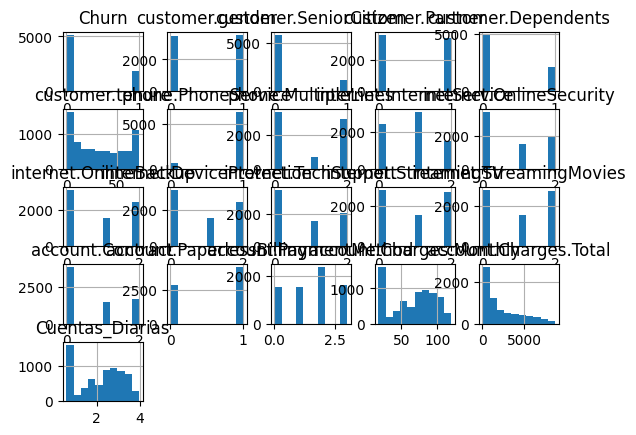

In [50]:
out.hist();

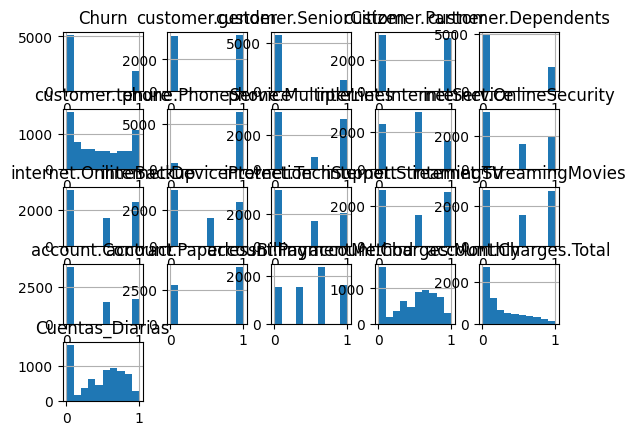

In [51]:
scaler = MinMaxScaler()
out_scaled = scaler.fit_transform(out)
out_scaled = pd.DataFrame(out_scaled, columns=out.columns)
out_scaled.hist();

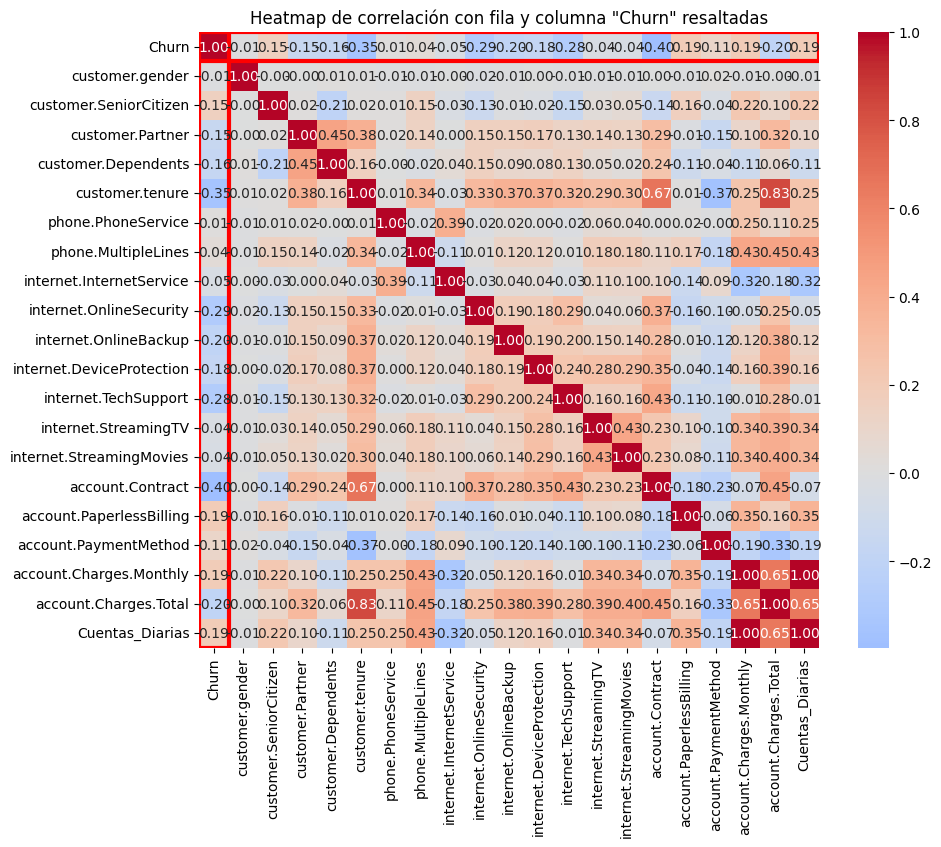

In [52]:
corr = out_scaled.corr()

# Crear heatmap con Seaborn
plt.figure(figsize = (10, 8))  # tamaño del gráfico
ax = sns.heatmap(corr, annot=True, fmt = ".2f", cmap = "coolwarm", center = 0)

# Obtener la posición del índice y columna 'Churn'
churn_idx = corr.index.get_loc('Churn')

# Dibujar rectángulo alrededor de la fila "Churn"
ax.add_patch(plt.Rectangle((0, churn_idx), len(corr), 1, fill = False, edgecolor = 'red', lw = 3))

# Dibujar rectángulo alrededor de la columna "Churn"
ax.add_patch(plt.Rectangle((churn_idx, 0), 1, len(corr), fill = False, edgecolor = 'red', lw = 3))

plt.title('Heatmap de correlación con fila y columna "Churn" resaltadas')
plt.show()

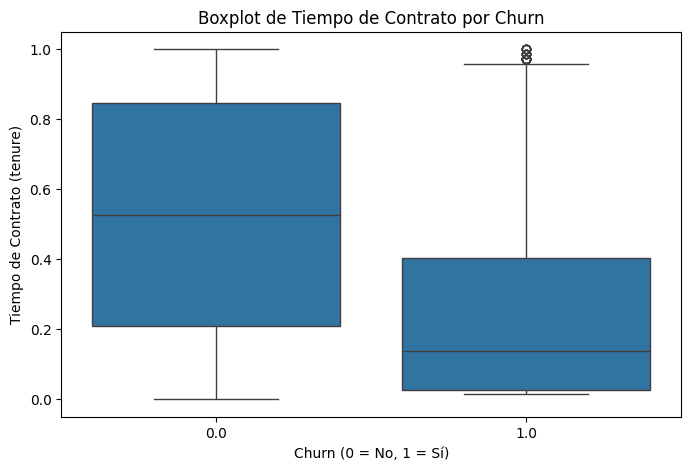

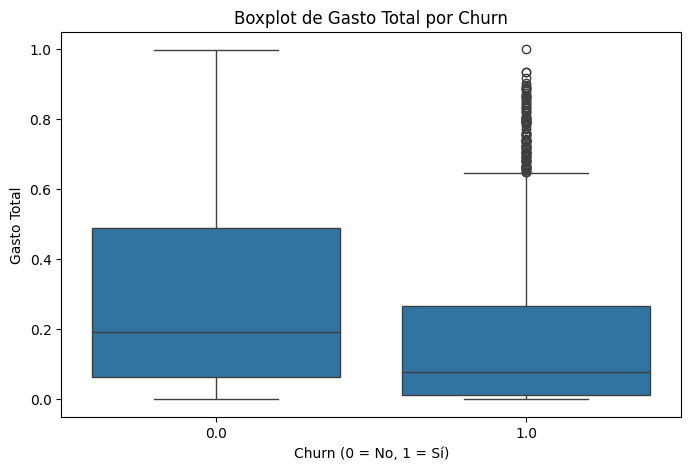

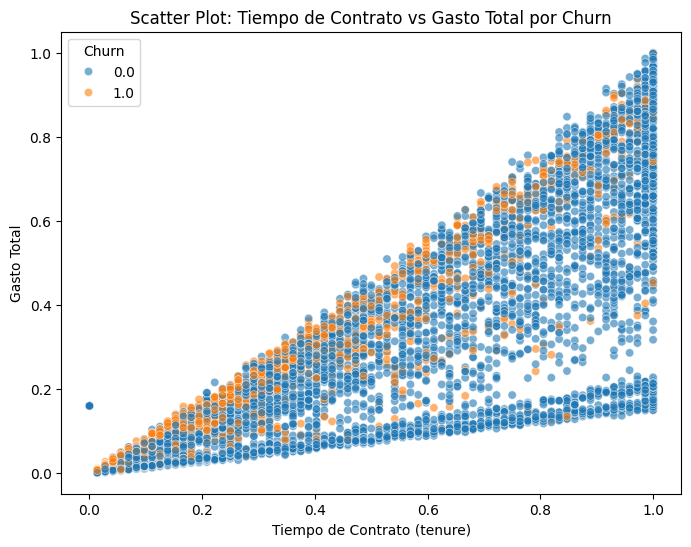

In [53]:
# Boxplot de 'customer.tenure' segmentado por churn (cancelación)
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'Churn', y = 'customer.tenure', data=out_scaled)
plt.title('Boxplot de Tiempo de Contrato por Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tiempo de Contrato (tenure)')
plt.show()

# Boxplot de 'account.Charges.Total' segmentado por churn
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'Churn', y = 'account.Charges.Total', data = out_scaled)
plt.title('Boxplot de Gasto Total por Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Gasto Total')
plt.show()

# Scatter plot mostrando relación Gasto Total vs Tiempo de Contrato, coloreado por churn
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'customer.tenure', y='account.Charges.Total', hue = 'Churn', data = out_scaled, alpha = 0.6)
plt.title('Scatter Plot: Tiempo de Contrato vs Gasto Total por Churn')
plt.xlabel('Tiempo de Contrato (tenure)')
plt.ylabel('Gasto Total')
plt.legend(title = 'Churn')
plt.show()


In [54]:
X = out_scaled.drop('Churn', axis = 1)
y = out_scaled['Churn']

# División estratificada 80-20 para mantener proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2, stratify = y, random_state = 42
)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3793 to 5679
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer.gender            5634 non-null   float64
 1   customer.SeniorCitizen     5634 non-null   float64
 2   customer.Partner           5634 non-null   float64
 3   customer.Dependents        5634 non-null   float64
 4   customer.tenure            5634 non-null   float64
 5   phone.PhoneService         5634 non-null   float64
 6   phone.MultipleLines        5634 non-null   float64
 7   internet.InternetService   5634 non-null   float64
 8   internet.OnlineSecurity    5634 non-null   float64
 9   internet.OnlineBackup      5634 non-null   float64
 10  internet.DeviceProtection  5634 non-null   float64
 11  internet.TechSupport       5634 non-null   float64
 12  internet.StreamingTV       5634 non-null   float64
 13  internet.StreamingMovies   5634 non-null   float64

Justificación técnica sobre la normalización para
Regresión Logística y KNN: trabajan con funciones que dependen de magnitudes relativas o distancias euclidianas. Sin normalizar, variables con rango amplio dominan la función objetivo o distancia, sesgando el modelo.

Árboles y Random Forest: basan las decisiones en reglas de corte (por ejemplo, "si tenure > 12 meses, entonces..."), independientes de la escala, por lo que normalizar no mejora ni empeora el rendimiento.

In [58]:
# Variables numéricas a normalizar
cols_to_scale = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']

# Escalador para Regresión Logística
scaler = StandardScaler()

# Copia para aplicar escalado solo para Regresión Logística
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


params = {
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],          # mezcla L1 y L2
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # inverso de regularización
    'max_iter': [1000, 2000, 3000],                # iteraciones para convergencia
    'tol': [1e-4, 1e-3, 1e-2],                     # tolerancia para criterio de parada
    'fit_intercept': [True, False],                 # incluye intercepto o no
    'warm_start': [True, False]                      # reutiliza soluciones anteriores para acelerar
}

params_rf = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}
# --- Modelo 1: Regresión Logística con datos normalizados ---
logreg = LogisticRegression(penalty="elasticnet", solver="saga", max_iter = 2000, random_state = 42)
grid = GridSearchCV(logreg, param_grid=params, scoring='roc_auc', cv=5, verbose=3)
grid.fit(X_train_scaled, y_train)
y_pred_logreg = grid.predict(X_test_scaled)
y_proba_logreg = grid.predict_proba(X_test_scaled)[:, 1]

print("Reporte Clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))
print("AUC ROC:", roc_auc_score(y_test, y_proba_logreg))

# --- Modelo 2: Random Forest sin normalización ---
rf = RandomForestClassifier(random_state = 42, class_weight="balanced")
grid_rf = GridSearchCV(rf, param_grid=params_rf, scoring='roc_auc', cv=5, verbose=3)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]

print("\nReporte Clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("AUC ROC:", roc_auc_score(y_test, y_proba_rf))

Se han truncado las últimas 5000 líneas del flujo de salida.
[CV 5/5] END C=0.01, fit_intercept=True, l1_ratio=0, max_iter=3000, tol=0.0001, warm_start=True;, score=0.836 total time=   0.1s
[CV 1/5] END C=0.01, fit_intercept=True, l1_ratio=0, max_iter=3000, tol=0.0001, warm_start=False;, score=0.853 total time=   0.1s
[CV 2/5] END C=0.01, fit_intercept=True, l1_ratio=0, max_iter=3000, tol=0.0001, warm_start=False;, score=0.832 total time=   0.1s
[CV 3/5] END C=0.01, fit_intercept=True, l1_ratio=0, max_iter=3000, tol=0.0001, warm_start=False;, score=0.838 total time=   0.1s
[CV 4/5] END C=0.01, fit_intercept=True, l1_ratio=0, max_iter=3000, tol=0.0001, warm_start=False;, score=0.829 total time=   0.1s
[CV 5/5] END C=0.01, fit_intercept=True, l1_ratio=0, max_iter=3000, tol=0.0001, warm_start=False;, score=0.836 total time=   0.1s
[CV 1/5] END C=0.01, fit_intercept=True, l1_ratio=0, max_iter=3000, tol=0.001, warm_start=True;, score=0.853 total time=   0.0s
[CV 2/5] END C=0.01, fit_interce

--- Resultados para Regresión Logística ---
Exactitud (Accuracy): 0.7921
Precisión: 0.6294
Recall: 0.5267
F1-score: 0.5735
Matriz de Confusión:
[[919 116]
 [177 197]]



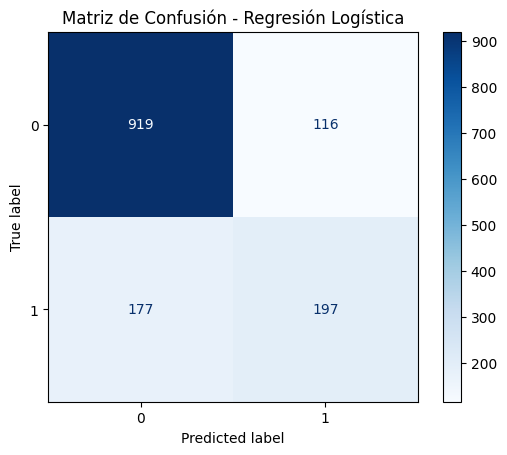

--- Resultados para Random Forest ---
Exactitud (Accuracy): 0.7722
Precisión: 0.5556
Recall: 0.7086
F1-score: 0.6228
Matriz de Confusión:
[[823 212]
 [109 265]]



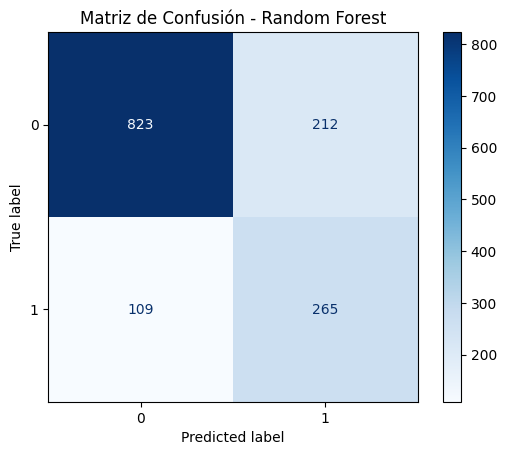

In [60]:
# Función para imprimir métricas y mostrar matriz de confusión
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"--- Resultados para {nombre_modelo} ---")
    print(f"Exactitud (Accuracy): {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Matriz de Confusión:\n{cm}\n")

    # Mostrar matriz de confusión visualmente
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = 'Blues')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()

# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_logreg, "Regresión Logística")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

Resumen final
El modelo de Regresión Logística tiene un desempeño ligeramente superior al Random Forest en este análisis.